In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.Symbol('x', real = True)

In [3]:
fExpr = 1 / x - 1/sp.Abs(x)
display(fExpr)
display(sp.limit(fExpr,x, 0, dir='+'))
display(sp.limit(fExpr,x, 0, dir='-'))

-1/Abs(x) + 1/x

0

-oo

In [4]:
fExpr = (sp.Abs(2*x-1) - sp.Abs(2*x+1)) / x
display(fExpr)
display(sp.limit(fExpr,x, 0, dir='+'))
display(sp.limit(fExpr,x, 0, dir='-'))

(Abs(2*x - 1) - Abs(2*x + 1))/x

-4

-4

In [5]:
f_expr = sp.E**x + 4*x
f = sp.Lambda(x,f_expr)

N_max = 100
tol = 1.e-5
a = -1
b = 0

x_aprox = np.zeros(N_max)

for k in range(0,N_max):
    x_aprox[k] = (a+b) / 2

    if f(x_aprox[k]) == 0: break
      
    if f(a) * f(x_aprox[k]) < 0:
        b = x_aprox[k]
    else:
       a = x_aprox[k]

    err_relativo = np.abs( x_aprox[k]-x_aprox[k-1] ) / np.abs( x_aprox[k] )
    if ( (k > 0) and ( err_relativo < tol ) ): break

print('Número de iteraciones realizadas: ', k+1) 
      # NOTA: Contamos 1 más, k+1, porque empezamos el bucle en 0
print('Aproximación de la raíz: ', x_aprox[k])
    

Número de iteraciones realizadas:  19
Aproximación de la raíz:  -0.2038898468017578


In [6]:
fExpr = -1 + 4*(x-1) + 2*(x-1)*(x-2) + sp.Rational('2/3')*(x-1)*(x-2)*(x-3)
display(fExpr.simplify())

f = sp.Lambda(x, fExpr)

display(f(1))
display(f(2))
display(f(3))
display(f(4))

display(f(sp.Rational('3/2')))

gExpr = 2**(x+1)-5
g = sp.Lambda(x, gExpr)
display(float(g(sp.Rational('3/2'))))

2*x**3/3 - 2*x**2 + 16*x/3 - 5

-1

3

11

27

3/4

0.6568542494923801

[-1.00000000e+00 -5.37368329e-01 -2.12296421e-02  5.54604570e-01
  1.19703857e+00  1.91377515e+00  2.71340798e+00  3.60552469e+00
  4.60082176e+00  5.71123281e+00  6.95007169e+00  8.33219210e+00
  9.87416568e+00  1.15944807e+01  1.35137638e+01  1.56550272e+01
  1.80439446e+01  2.07091593e+01  2.36826271e+01  2.70000000e+01]


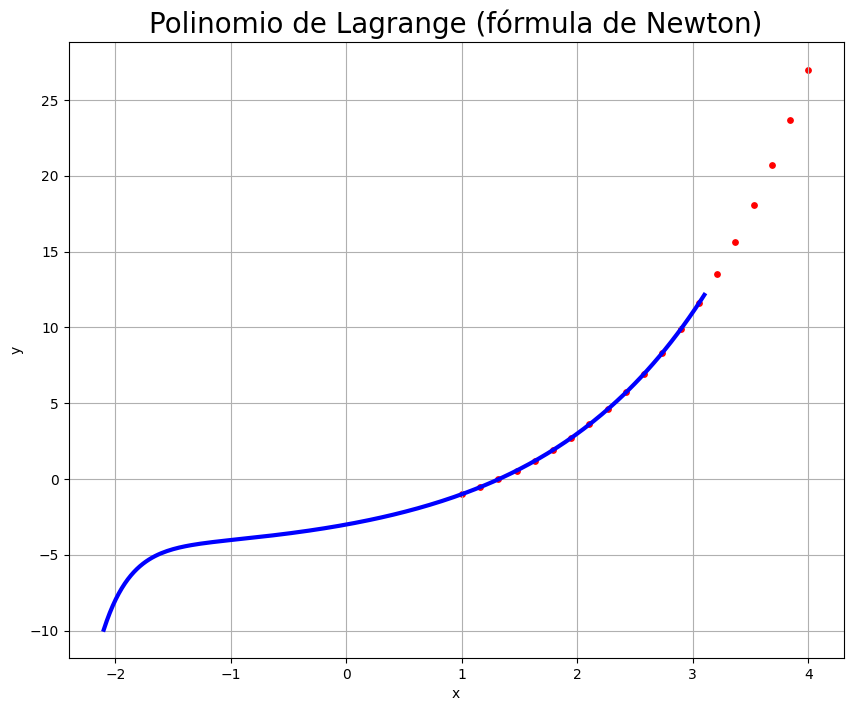

In [7]:
x_coef = np.linspace(1,4,20)

f = 2**(x+1)-5
fn =sp.lambdify(x, f)

y_coef = fn(x_coef)
np.array([-1, 3, 11, 9])
print(y_coef)

n = len(x_coef)

# Almacenaremos en "tabla" la matriz de diferencias divididas
tabla = np.zeros([n, n])

# La primera columna serán los datos en y
tabla[:,0] = y_coef

# Necesitamos un doble bucle para crear el resto de "tabla"
for j in range(1,n):
    for i in range(n-j):
        tabla[i,j] = (tabla[i+1,j-1] - tabla[i,j-1]) / (x_coef[i+j]-x_coef[i])

# Definimos la expresión para el Polinomio de Lagrange (versión Newton)
P_expr = tabla[0,0]
multiplica = sp.S('1')
for k in range(1,n):
    multiplica = multiplica * (x - x_coef[k-1])
    P_expr = P_expr + tabla[0,k] * multiplica

# Creamos la función lambdify para dibujarla
P = sp.lambdify(x,P_expr)

xx = np.linspace(-2.1, 3.1, 200)
P_vec = P(xx)

# dibujamos el resultado
fig = plt.figure(figsize = (10,8))
plt.scatter(x_coef, y_coef, s=15, c='r')
plt.plot(xx, P_vec, 'b', lw='3')
plt.title('Polinomio de Lagrange (fórmula de Newton)', fontsize=20)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [43]:
fExpr = sp.sqrt(x**2 + 1) - x
display(fExpr)

display(sp.limit(fExpr,x,sp.oo))
display(sp.limit(fExpr,x,-sp.oo))

m = sp.limit(fExpr / x, x, -sp.oo)
display(m)
n = sp.limit(fExpr-m*x,x,-sp.oo)
display(n)
A0 = m*x+n
display(A0)

p = sp.plot(fExpr, A0, 0, (x, -10, 10), show = False)
p[0].line_color('r')
p[1].line_color('b')
p[2].line_color('b')

# si los limites coinciden entonces si existe limite en el caso de que no entonces no existe

# EJERCICIOS EXAMEN = / continuidad / dicotomia / interpolacion de lagrange

-x + sqrt(x**2 + 1)

0

oo

-2

0

-2*x

In [4]:
fExpr = (sp.Abs(2*x - 1) - sp.Abs(2*x + 1)) / x
display(fExpr)

f = sp.Lambda(x, fExpr)

display(f(1/2))

(Abs(2*x - 1) - Abs(2*x + 1))/x

-4.00000000000000